In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM (out of memory) error by seting GPU Memory consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [4]:
data_dir = 'expression data'

In [5]:
os.listdir(data_dir)

['happy', 'sad']

In [6]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
# removing unwanted images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list expression data\happy\2560px-Happy_People.jpg
Image not in ext list expression data\happy\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list expression data\happy\56f455011e0000b300705475.jpg
Image not in ext list expression data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list expression data\happy\portrait-smiling-young-friends-walking-260nw-1392193913.jpg
Image not in ext list expression data\happy\young-woman-curly-hair-laughing-260nw-1687578475.jpg
Image not in ext list expression data\happy\_width=2000&size=1.jpg
Image not in ext list expression data\sad\113835831-sad-expressions-screaming-and-crying-little-crying-boy-portrait.webp
Image not in ext list expression data\sad\17573464-young-girl-with-sad-expression.webp
Image not in ext list expression data\sad\199033998-portrait-of-an-old-woman-with-a-sad-expression-on-her-face.webp
Image not in ext list expression data\sad\33983193-young-kid-with-sad-eyes-and-expression.

In [12]:
tf.data.Dataset??
### to open tf.data.Dataset api

In [13]:
import numpy as np

In [65]:
### creating the data pipeline
data = tf.keras.utils.image_dataset_from_directory('expression data')

Found 136 files belonging to 2 classes.


In [66]:
### to access or convert the data
data_iterator = data.as_numpy_iterator()

In [67]:
batch = data_iterator.next()

In [68]:
### images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [69]:
### batch 0 = happy, batch 1 = sad
batch[1]

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

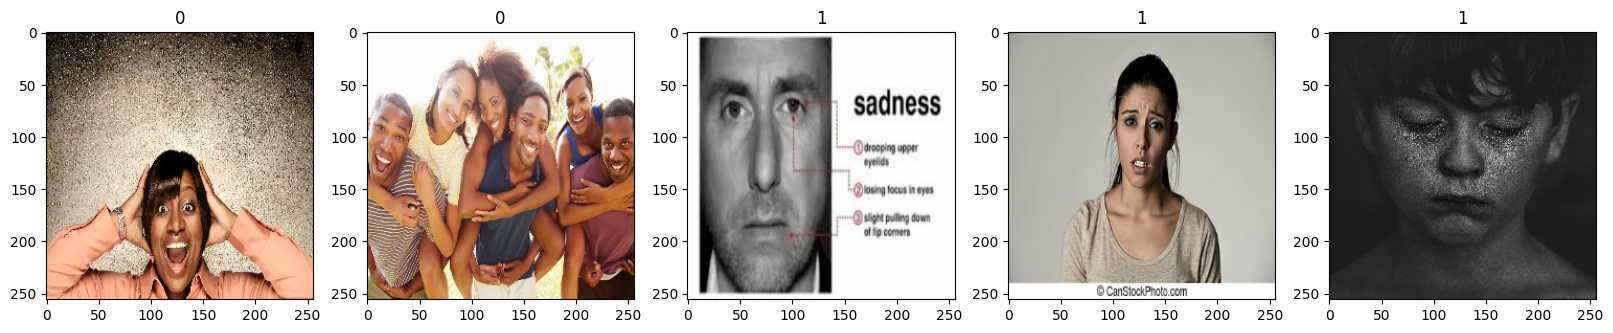

In [70]:
fig, ax = plt.subplots(ncols = 5, figsize = (20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [71]:
### pre processing the data - scaling image values in [0,1] from array of 0-255, train-test-cv partitions

In [72]:
### scaling the data
data = data.map(lambda x,y:(x/255,y))

In [75]:
data.as_numpy_iterator().next()

(array([[[[0.541086  , 0.5332429 , 0.5450076 ],
          [0.61382246, 0.61382246, 0.61382246],
          [0.572547  , 0.572547  , 0.572547  ],
          ...,
          [0.6509804 , 0.63529414, 0.6392157 ],
          [0.6491345 , 0.63344824, 0.6373698 ],
          [0.6480009 , 0.6244715 , 0.6323146 ]],
 
         [[0.6649084 , 0.6570653 , 0.66883   ],
          [0.6468854 , 0.6468854 , 0.6468854 ],
          [0.5255481 , 0.5255481 , 0.5255481 ],
          ...,
          [0.66384035, 0.6481541 , 0.65207565],
          [0.65289265, 0.6372064 , 0.64112794],
          [0.65207565, 0.62854624, 0.6363894 ]],
 
         [[0.50199467, 0.50199467, 0.5098378 ],
          [0.6496306 , 0.6496306 , 0.65747374],
          [0.6589406 , 0.6589406 , 0.66678375],
          ...,
          [0.65569085, 0.6400046 , 0.64392614],
          [0.65882355, 0.6431373 , 0.64705884],
          [0.6509804 , 0.63529414, 0.6392157 ]],
 
         ...,
 
         [[0.13333334, 0.13333334, 0.13333334],
          [0.13333

In [77]:
### splitting the data 60-20-20
len(data) #each batch hS 32 IMAGES

5

In [89]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [92]:
val_size

1

In [93]:
### using take and skip function of tf.data pipeline to assign the data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [94]:
### building the deep learning model

In [96]:
### Conv2D - 2d convolutional layer, MaxPooling2D - condensing layer, Dropout - for regularization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [104]:
model = Sequential()

In [105]:
### syntax - Conv2D(no of filters, pixel_size, no of filters to cover per step, activation, input_shape)

model.add(Conv2D(16 ,(3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [106]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [109]:
### train the model
logdir = 'logs'

In [110]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [112]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 6s 2s/step - loss: 1.4440 - accuracy: 0.4479 - val_loss: 0.9127 - val_accuracy: 0.3750
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 0.7695 - accuracy: 0.4688 - val_loss: 0.7016 - val_accuracy: 0.4688
Epoch 3/20
3/3 [==============================] - 5s 1s/step - loss: 0.6666 - accuracy: 0.4792 - val_loss: 0.6280 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 5s 1s/step - loss: 0.6392 - accuracy: 0.5625 - val_loss: 0.5777 - val_accuracy: 0.6562
Epoch 5/20
3/3 [==============================] - 5s 1s/step - loss: 0.5755 - accuracy: 0.7500 - val_loss: 0.5425 - val_accuracy: 0.7812
Epoch 6/20
3/3 [==============================] - 5s 1s/step - loss: 0.5170 - accuracy: 0.7604 - val_loss: 0.4359 - val_accuracy: 0.8125
Epoch 7/20
3/3 [==============================] - 5s 1s/step - loss: 0.4690 - accuracy: 0.8021 - val_loss: 0.4067 - val_accuracy: 0.8750
Epoch 8/20
3/3 [=========================

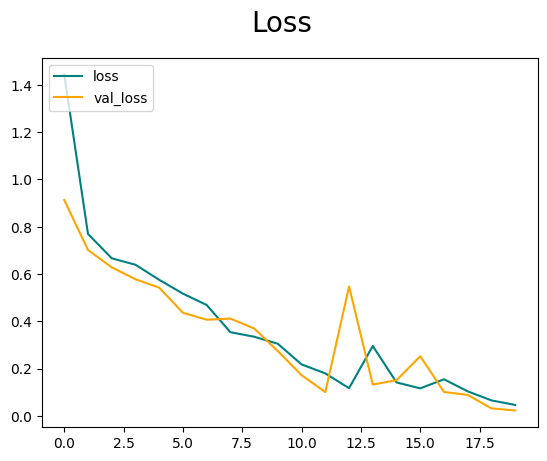

In [117]:
### plot the performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

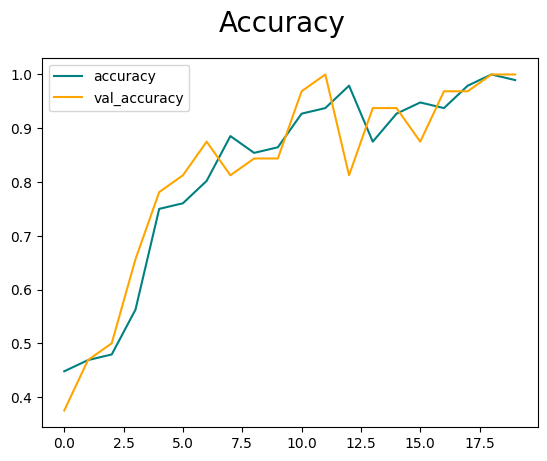

In [119]:
### plot the accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [121]:
### evaluating the model
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [122]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [123]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 153ms/step


In [124]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [125]:
### testing the model

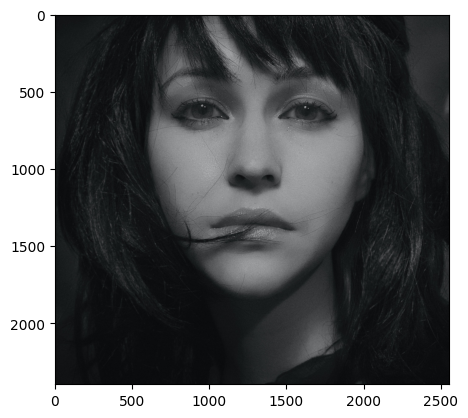

In [140]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

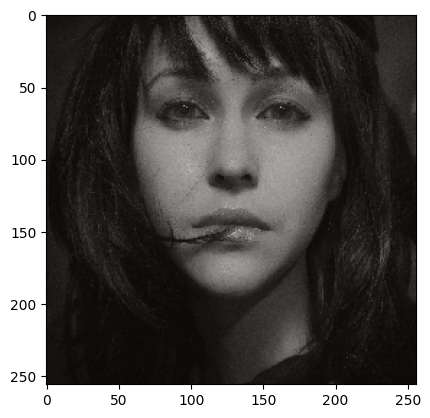

In [141]:
### resize the image to 256-256-3
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [142]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 26ms/step


In [143]:
yhat

array([[0.9100855]], dtype=float32)

In [144]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predited class is happy')

Predicted class is sad


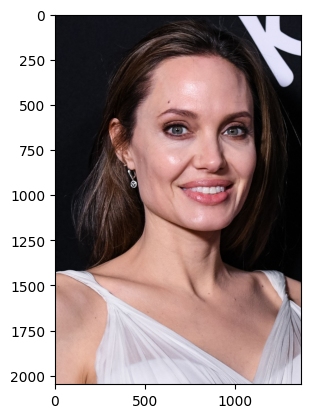

In [145]:
img = cv2.imread('happytest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

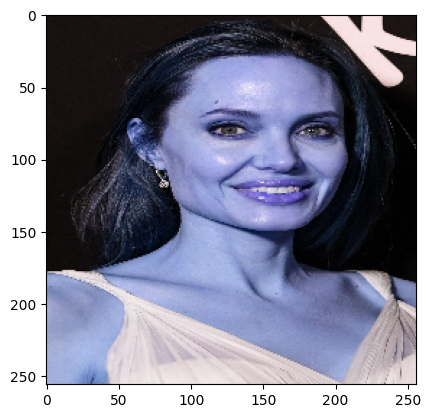

In [146]:
### resize the image to 256-256-3
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [147]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [148]:
yhat

array([[0.13586944]], dtype=float32)

In [149]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predited class is happy')

Predited class is happy
